## Random Forest model
This code is using the random forest model to make predictions of the imputed data and compare the prediction with the original data by calculating the MSE(mean square error). Then for different method and different dataset, we calculated the error and show the interval of error for each line for statistical analysis.

Note: Running the machine learning models will take many hours.

In [48]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestRegressor

TrainSetRatio=0.7

method=["mean","KNN","HD"]
i_index=[1,2,3]
j_index=range(20,100,5)
ilen=len(i_index)
jlen=len(j_index)
meanErr=np.zeros((ilen,jlen))
KNNErr=np.zeros((ilen,jlen))
HDErr=np.zeros((ilen,jlen))
meanErrVar=np.zeros((ilen,jlen))
KNNErrVar=np.zeros((ilen,jlen))
HDErrVar=np.zeros((ilen,jlen))
errVar=[meanErrVar,KNNErrVar,HDErrVar]
nRep=100
for md in range(len(method)):
    for i in range(len(i_index)):
        for j in range(len(j_index)):
            errSample=np.zeros((nRep,1))
            for s in range(nRep):
                data = pd.read_csv("imputed data\data{}_{}-{}.csv".format
                                   (i_index[i],method[md],j_index[j]))
                if data.isna().sum().sum() !=0:
                    continue
                m=data.iloc[:,0].size
                trainSize=round(m*TrainSetRatio)
                smpl=random.sample(range(m),trainSize)
                wholeSet=set(range(m))
                smplSet=set(smpl)
                testSet=wholeSet-smplSet
                smplC=list(testSet)
                train=data.iloc[smpl,:-1]
                y_Otrain=data.iloc[smpl,-1]
                test=data.iloc[smplC,:-1]
                y_Otest=data.iloc[smplC,-1]
                rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
                x=train.iloc[:,1:]
                y=y_Otrain
                rf.fit(x, y)
                y_estimate = rf.predict(test.iloc[:,1:])
                y_test=y_Otest.values
                sum=0
                for k in range(len(y_test)):
                    sum+=(y_test[k]-y_estimate[k])**2
                sum/=len(y_test)
                errSample[s]=sum
            err[md][i][j]=np.mean(errSample)
            errVar[md][i][j]=np.var(errSample)
for i in range(3):
    print(err[i])
for i in range(3):
    print(errVar[i])

[[14.70392039 14.97301601 17.55108323 19.40638113 17.17322361 25.82591638
  31.54556563 20.29189149 25.86102363 34.23248493 42.9246051  38.83374852
  48.50300553 44.48900503 41.9123418  49.95207135]
 [15.83990388 14.43943794 21.44305508 16.88684087 23.70427238 22.65306178
  27.87996679 25.36433205 35.0155936  33.80105511 34.31396466 34.29904289
  41.65048316 39.83068168 41.38159778 43.68656857]
 [ 9.54799966 11.00163001 11.55902247 14.20155383 18.22564209 17.151871
  20.52141676 22.73838434 24.10458138 26.40084819 27.43893218 28.24268322
  32.91202074 33.47082149 36.6683185  36.22516985]]
[[16.76896126 15.81911984 19.76022363 19.02344674 16.65881498 26.77639603
  29.4010752  20.16589276 24.23325869 35.95087963 41.64092546 39.8566482
  48.32826532  0.         38.44393891  0.        ]
 [17.46339204 13.77020495 20.42158305 17.09258659 22.77599327 23.57603492
  28.10174687 25.09160248 34.3653976  33.46170797 35.15636482 34.30395465
  41.83356218 40.8338582   0.          0.        ]
 [10.07

In [55]:
errVar[2]

array([[ 15.07724142,  20.32905668,   8.92976277,  32.60183031,
         23.30929424,  37.08672103,  65.55999422,  25.26579632,
         54.07488707,  52.2462092 ,  67.27213317,  93.42634885,
        127.41520864,  55.39933929,  58.72577711, 101.34205662],
       [ 14.63023609,  12.66787558,  15.35889507,   8.00983073,
         42.04371323,  30.45643301,  28.86732681,  25.31172749,
         40.95442627,  30.76354301,  41.06000619,  40.35517549,
         53.80280974,  44.91620093,  54.91531768,  45.59696672],
       [  1.40675462,   2.80814023,   1.89893545,   3.35146516,
          5.69419218,   4.64580013,   4.73903812,   6.32226106,
          7.348111  ,  11.87305069,  11.0078815 ,   8.09247206,
         10.48165218,  10.90500578,  12.44711501,   9.88260521]])

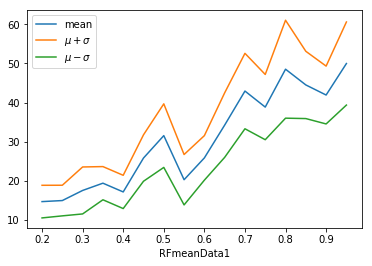

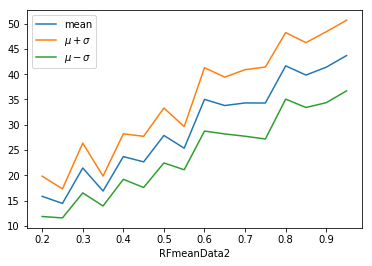

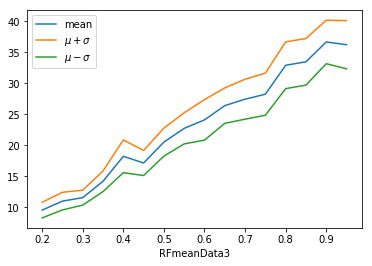

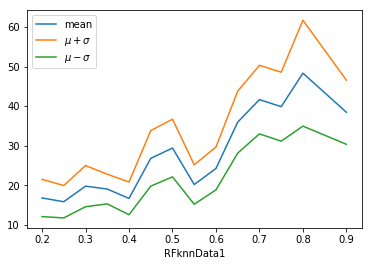

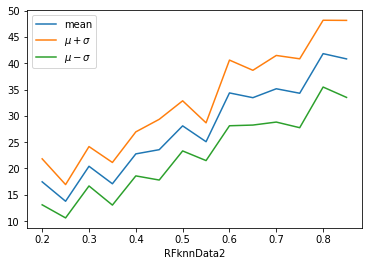

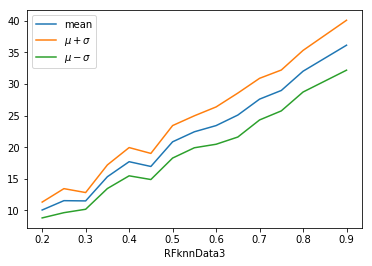

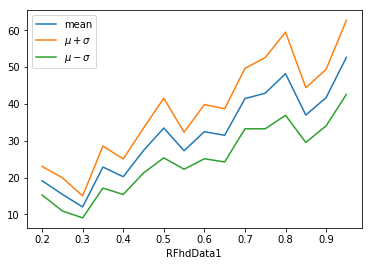

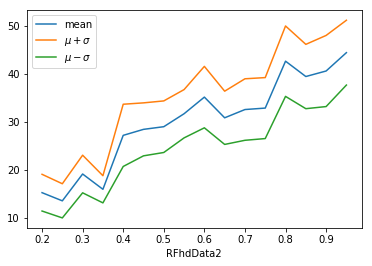

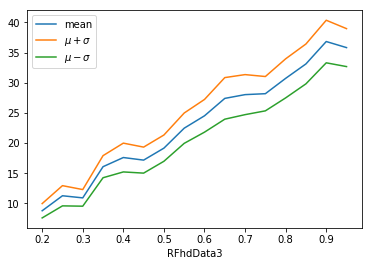

In [57]:
import matplotlib.pyplot as plt
import numpy as np

mn0=[14.70392039, 14.97301601, 17.55108323, 19.40638113, 17.17322361,
        25.82591638, 31.54556563, 20.29189149, 25.86102363, 34.23248493,
        42.9246051 , 38.83374852, 48.50300553, 44.48900503, 41.9123418 ,
        49.95207135]
mn1=[15.83990388, 14.43943794, 21.44305508, 16.88684087, 23.70427238,
        22.65306178, 27.87996679, 25.36433205, 35.0155936 , 33.80105511,
        34.31396466, 34.29904289, 41.65048316, 39.83068168, 41.38159778,
        43.68656857]
mn2=[ 9.54799966, 11.00163001, 11.55902247, 14.20155383, 18.22564209,
        17.151871  , 20.52141676, 22.73838434, 24.10458138, 26.40084819,
        27.43893218, 28.24268322, 32.91202074, 33.47082149, 36.6683185 ,
        36.22516985]
xmn0=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
xmn1=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
xmn2=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
knn0=[16.76896126, 15.81911984, 19.76022363, 19.02344674, 16.65881498,
        26.77639603, 29.4010752 , 20.16589276, 24.23325869, 35.95087963,
        41.64092546, 39.8566482 , 48.32826532, 38.44393891]
knn1=[17.46339204, 13.77020495, 20.42158305, 17.09258659, 22.77599327,
        23.57603492, 28.10174687, 25.09160248, 34.3653976 , 33.46170797,
        35.15636482, 34.30395465, 41.83356218, 40.8338582 ]
knn2=[10.07036653, 11.54847721, 11.50895165, 15.33356067, 17.71050788,
        16.95597655, 20.85549405, 22.44098798, 23.41962124, 25.08666066,
        27.60515372, 28.97561412, 32.01891697, 36.13224022]
xknn0=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.90]
xknn1=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85]
xknn2=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.90]
hd0=[19.16185881, 15.45841456, 12.04228844, 22.86503352, 20.23954595,
        27.33610274, 33.45576003, 27.29372348, 32.46682145, 31.47562421,
        41.44490832, 42.92307982, 48.20278084, 36.97607279, 41.71911395,
        52.65426455]
hd1=[15.28874327, 13.58840582, 19.17818137, 15.99205629, 27.23257441,
        28.48155864, 29.03497142, 31.73690435, 35.20227408, 30.88913247,
        32.61061605, 32.91445701, 42.68736752, 39.49081202, 40.64108893,
        44.46377719]
hd2=[ 8.78701297, 11.27279313, 10.92247799, 16.0906688 , 17.60896696,
        17.18061971, 19.16590596, 22.47417848, 24.52519941, 27.41057439,
        28.03470662, 28.18965364, 30.73352195, 33.12584454, 36.8349106 ,
        35.82661399]
xhd0=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
xhd1=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
xhd2=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
vmn0=[ 17.34130892,  15.28435456,  35.93496533,  17.94900323,
         18.04084861,  35.12402924,  65.80516625,  41.35769984,
         32.29259474,  67.80098305,  92.70524599,  69.37616922,
        156.24262414,  73.74659636,  54.52058606, 112.46406885]
vmn1=[ 15.92401545,   8.23622661,  24.26217482,   8.73474077,
         20.26666726,  25.62539   ,  29.50385909,  18.22555881,
         39.25697971,  31.59791137,  43.37945405,  50.63382481,
         43.3442154 ,  41.10661088,  49.24435945,  48.81752523]
vmn2=[  1.58411806,   2.02768968,   1.45258608,   2.77644178,
          6.97409557,   4.1015049 ,   5.11188102,   6.2937553 ,
         10.67434019,   8.16190717,  10.38593637,  11.51575805,
         14.21687437,  14.12399064,  12.29043786,  15.11536208]
vknn0=[ 22.18040678,  16.75918626,  27.10431276,  14.04960479,
         17.05912333,  49.25696543,  53.18551197,  24.88944087,
         29.34164913,  61.4578107 ,  75.08351833,  76.01959821,
        179.20416332,   65.72277112]
vknn1=[ 19.10225314,  10.04028429,  14.02515172,  16.41770951,
         17.51095582,  33.32989793,  22.70390686,  12.87868503,
         38.96725959,  27.10796543,  40.09749609,  42.88719193,
         40.32497855,  53.60225615, ]
vknn2=[  1.56484739,   3.61345232,   1.74521132,   3.49120453,
          4.99249516,   4.26597916,   6.60110057,   6.39172951,
          8.70488803,  12.07411771,  10.8360889 ,  10.4413174 ,
         10.82762357,   15.58945337]
vhd0=[ 15.07724142,  20.32905668,   8.92976277,  32.60183031,
         23.30929424,  37.08672103,  65.55999422,  25.26579632,
         54.07488707,  52.2462092 ,  67.27213317,  93.42634885,
        127.41520864,  55.39933929,  58.72577711, 101.34205662]
vhd1=[ 14.63023609,  12.66787558,  15.35889507,   8.00983073,
         42.04371323,  30.45643301,  28.86732681,  25.31172749,
         40.95442627,  30.76354301,  41.06000619,  40.35517549,
         53.80280974,  44.91620093,  54.91531768,  45.59696672]
vhd2=[  1.40675462,   2.80814023,   1.89893545,   3.35146516,
          5.69419218,   4.64580013,   4.73903812,   6.32226106,
          7.348111  ,  11.87305069,  11.0078815 ,   8.09247206,
         10.48165218,  10.90500578,  12.44711501,   9.88260521]
xmn=[xmn0,xmn1,xmn2]
xknn=[xknn0,xknn1,xknn2]
xhd=[xhd0,xhd1,xhd2]
x=[xmn,xknn,xhd]
mn=[mn0,mn1,mn2]
knn=[knn0,knn1,knn2]
hd=[hd0,hd1,hd2]
y=[mn,knn,hd]
vmn=[vmn0,vmn1,vmn2]
vknn=[vknn0,vknn1,vknn2]
vhd=[vhd0,vhd1,vhd2]
v=[vmn,vknn,vhd]
iindex=['mean','knn','hd']
jindex=['Data1','Data2','Data3']
for i in range(3):
    for j in range(3):     
        plt.plot(x[i][j],y[i][j],label="mean")
        plt.plot(x[i][j],y[i][j]+np.sqrt(v[i][j]),label=r'$\mu+\sigma$')
        plt.plot(x[i][j],y[i][j]-np.sqrt(v[i][j]),label=r'$\mu-\sigma$')
        plt.xlabel("RF{}{}".format(iindex[i],jindex[j]))
        plt.legend()
        plt.savefig("RF{}{}".format(iindex[i],jindex[j]))
        plt.show()